<h1 align="center"><b><font color="green">Online retail Analysis</font></b></h1>
<h5 align="right"><font color="blue">-By Mudrika Yaduvanshi</font></h5>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing dataset

In [2]:
data=pd.read_csv("D:\money\CAPSTONE PYTHON\\OnlineRetail.csv",encoding="latin")

In [3]:
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,JUMBO BAG PINK POLKADOT,10,1/4/2011 10:00,1.95,13313.0,United Kingdom
1,539993,21499,BLUE POLKADOT WRAP,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
2,539993,21498,RED RETROSPOT WRAP,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
3,539993,22379,RECYCLING BAG RETROSPOT,5,1/4/2011 10:00,2.10,13313.0,United Kingdom
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,1/4/2011 10:00,1.25,13313.0,United Kingdom


### Basic Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499428 entries, 0 to 499427
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    499428 non-null  object 
 1   StockCode    499428 non-null  object 
 2   Description  498099 non-null  object 
 3   Quantity     499428 non-null  int64  
 4   InvoiceDate  499428 non-null  object 
 5   UnitPrice    499428 non-null  float64
 6   CustomerID   379979 non-null  float64
 7   Country      499428 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 30.5+ MB


In [5]:
date=data["InvoiceDate"].apply(lambda x: x.split(" ")[0])
data.insert(5,"date",date)

In [6]:
time=data["InvoiceDate"].apply(lambda x: x.split(" ")[1])
data.insert(6,"time",time)

In [7]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,date,time,UnitPrice,CustomerID,Country
0,539993,22386,JUMBO BAG PINK POLKADOT,10,1/4/2011 10:00,1/4/2011,10:00,1.95,13313.0,United Kingdom
1,539993,21499,BLUE POLKADOT WRAP,25,1/4/2011 10:00,1/4/2011,10:00,0.42,13313.0,United Kingdom
2,539993,21498,RED RETROSPOT WRAP,25,1/4/2011 10:00,1/4/2011,10:00,0.42,13313.0,United Kingdom
3,539993,22379,RECYCLING BAG RETROSPOT,5,1/4/2011 10:00,1/4/2011,10:00,2.10,13313.0,United Kingdom
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,1/4/2011 10:00,1/4/2011,10:00,1.25,13313.0,United Kingdom


In [8]:
data["date"]=pd.to_datetime(data.date)

In [9]:
data["time"]=pd.to_datetime(data.time)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499428 entries, 0 to 499427
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    499428 non-null  object        
 1   StockCode    499428 non-null  object        
 2   Description  498099 non-null  object        
 3   Quantity     499428 non-null  int64         
 4   InvoiceDate  499428 non-null  object        
 5   date         499428 non-null  datetime64[ns]
 6   time         499428 non-null  datetime64[ns]
 7   UnitPrice    499428 non-null  float64       
 8   CustomerID   379979 non-null  float64       
 9   Country      499428 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 38.1+ MB


In [11]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,499428.000000,499428.000000,379979.000000
mean,9.679517,4.481693,15271.312675
std,226.515728,92.194767,1710.629829
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13923.000000
50%,3.000000,2.080000,15116.000000
75%,10.000000,4.130000,16770.000000
max,80995.000000,38970.000000,18287.000000


##### Removing negative values from quantity and unitprice column to avoid any error

In [12]:
data=data.loc[data["Quantity"]>=0]

In [13]:
data=data.loc[data["UnitPrice"]>=0]

In [14]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,489600.000000,489600.000000,371764.000000
mean,10.822433,3.822597,15277.794830
std,163.007328,31.363455,1710.030407
min,1.000000,0.000000,12346.000000
25%,1.000000,1.250000,13941.000000
50%,4.000000,2.080000,15125.000000
75%,12.000000,4.130000,16775.000000
max,80995.000000,11062.060000,18287.000000


### Count and distnct count of columns

In [15]:
data["Description"].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2092
JUMBO BAG RED RETROSPOT                1994
REGENCY CAKESTAND 3 TIER               1841
PARTY BUNTING                          1659
LUNCH BAG RED RETROSPOT                1506
                                       ... 
SILICON CUBE 25W, BLUE                    1
ROCOCO WALL MIROR                         1
PINK ACRYLIC JEWEL SNOWFLAKE              1
SET 10 CARDS SWIRLY XMAS TREE 17104       1
BLACK FLOWER CANDLE PLATE                 1
Name: Description, Length: 3973, dtype: int64

In [16]:
data["Country"].value_counts()

United Kingdom          446859
Germany                   8529
France                    7974
EIRE                      7520
Spain                     2410
Netherlands               2291
Belgium                   1936
Switzerland               1918
Portugal                  1385
Australia                 1153
Norway                     925
Channel Islands            731
Italy                      718
Finland                    668
Cyprus                     531
Unspecified                446
Sweden                     425
Austria                    390
Denmark                    360
Poland                     322
Israel                     295
Hong Kong                  284
Japan                      256
Singapore                  222
USA                        179
Iceland                    151
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon 

### Finding and dealing with null values

In [17]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description       529
Quantity            0
InvoiceDate         0
date                0
time                0
UnitPrice           0
CustomerID     117836
Country             0
dtype: int64

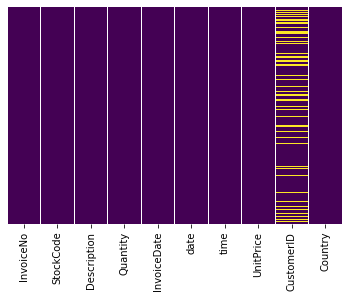

In [18]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [19]:
pd.DataFrame(round(data.isnull().sum()/data.shape[0]*100,3),columns=["NullValuePercentage"])

,NullValuePercentage
InvoiceNo,0.000
StockCode,0.000
Description,0.108
Quantity,0.000
InvoiceDate,0.000
date,0.000
time,0.000
UnitPrice,0.000
CustomerID,24.068
Country,0.000


#####  approx. 24% of data is null from CustomerID 

- Dropping null values from Customer ID column 

In [20]:
data=data.dropna(subset=["CustomerID"])

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371764 entries, 0 to 499427
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    371764 non-null  object        
 1   StockCode    371764 non-null  object        
 2   Description  371764 non-null  object        
 3   Quantity     371764 non-null  int64         
 4   InvoiceDate  371764 non-null  object        
 5   date         371764 non-null  datetime64[ns]
 6   time         371764 non-null  datetime64[ns]
 7   UnitPrice    371764 non-null  float64       
 8   CustomerID   371764 non-null  float64       
 9   Country      371764 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 31.2+ MB


### Revenue per month

In [22]:
data["Year"]=pd.DatetimeIndex(data["InvoiceDate"]).year

In [23]:
data["Month"]=pd.DatetimeIndex(data["InvoiceDate"]).month

In [24]:
data["day"]=pd.DatetimeIndex(data["InvoiceDate"]).day

In [25]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,date,time,UnitPrice,CustomerID,Country,Year,Month,day
0,539993,22386,JUMBO BAG PINK POLKADOT,10,1/4/2011 10:00,2011-01-04,2021-08-21 10:00:00,1.95,13313.0,United Kingdom,2011,1,4
1,539993,21499,BLUE POLKADOT WRAP,25,1/4/2011 10:00,2011-01-04,2021-08-21 10:00:00,0.42,13313.0,United Kingdom,2011,1,4
2,539993,21498,RED RETROSPOT WRAP,25,1/4/2011 10:00,2011-01-04,2021-08-21 10:00:00,0.42,13313.0,United Kingdom,2011,1,4
3,539993,22379,RECYCLING BAG RETROSPOT,5,1/4/2011 10:00,2011-01-04,2021-08-21 10:00:00,2.10,13313.0,United Kingdom,2011,1,4
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,1/4/2011 10:00,2011-01-04,2021-08-21 10:00:00,1.25,13313.0,United Kingdom,2011,1,4


In [26]:
len(data["Year"].unique())    # only single year data

1

In [27]:
len(data["Month"].unique())    #12 months

12

In [28]:
len(data["InvoiceNo"].unique())    # 20482 total unique orders

17136

In [29]:
#REVENUE 
data["Revenue"]=data["UnitPrice"]*data["Quantity"]

In [30]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,date,time,UnitPrice,CustomerID,Country,Year,Month,day,Revenue
0,539993,22386,JUMBO BAG PINK POLKADOT,10,1/4/2011 10:00,2011-01-04,2021-08-21 10:00:00,1.95,13313.0,United Kingdom,2011,1,4,19.5
1,539993,21499,BLUE POLKADOT WRAP,25,1/4/2011 10:00,2011-01-04,2021-08-21 10:00:00,0.42,13313.0,United Kingdom,2011,1,4,10.5
2,539993,21498,RED RETROSPOT WRAP,25,1/4/2011 10:00,2011-01-04,2021-08-21 10:00:00,0.42,13313.0,United Kingdom,2011,1,4,10.5
3,539993,22379,RECYCLING BAG RETROSPOT,5,1/4/2011 10:00,2011-01-04,2021-08-21 10:00:00,2.10,13313.0,United Kingdom,2011,1,4,10.5
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,1/4/2011 10:00,2011-01-04,2021-08-21 10:00:00,1.25,13313.0,United Kingdom,2011,1,4,12.5


- Revenue by month

In [31]:
Revenue_data= data.groupby('Month')["Revenue"].sum().reset_index()

In [32]:
Revenue_data

,Month,Revenue
0,1,569445.040
1,2,447137.350
2,3,595500.760
3,4,469200.361
4,5,678594.560
5,6,661213.690
6,7,600091.011
7,8,645343.900
8,9,952838.382
9,10,1039318.790


Text(0.5, 1.0, 'Revenue per month')

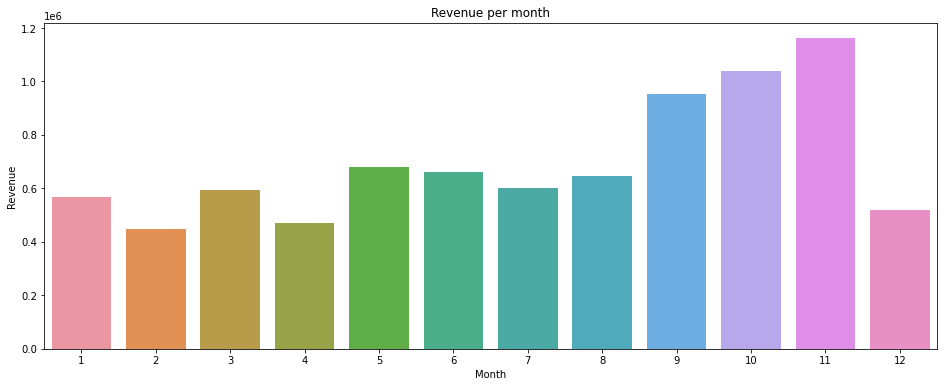

In [33]:
plt.axes=plt.subplots(figsize=(16,6))

a=sns.barplot(x="Month",y="Revenue",data=Revenue_data)
a.set_title("Revenue per month")

- The revenue for the 11th month of the year is highest
- There was a sudden fall in revenue in the 12th month
- There was a constant rise till 11th month in the revenue after 7th month
- The highest amount of boom in revenue occured in 9th month
- From this data we can predict that we don't have complete data of 12th month

### Cumulative revenue across all months

#### Cumulative Revenue

In [34]:
Revenue_data["CumulativeRevenue"]=Revenue_data.groupby("Month")["Revenue"].sum().transform('cumsum')

In [35]:
Revenue_data

,Month,Revenue,CumulativeRevenue
0,1,569445.040,NaN
1,2,447137.350,569445.040
2,3,595500.760,1016582.390
3,4,469200.361,1612083.150
4,5,678594.560,2081283.511
5,6,661213.690,2759878.071
6,7,600091.011,3421091.761
7,8,645343.900,4021182.772
8,9,952838.382,4666526.672
9,10,1039318.790,5619365.054


In [36]:
Revenue_data=Revenue_data.fillna(value=0,axis=0)

In [37]:
Revenue_data

,Month,Revenue,CumulativeRevenue
0,1,569445.040,0.000
1,2,447137.350,569445.040
2,3,595500.760,1016582.390
3,4,469200.361,1612083.150
4,5,678594.560,2081283.511
5,6,661213.690,2759878.071
6,7,600091.011,3421091.761
7,8,645343.900,4021182.772
8,9,952838.382,4666526.672
9,10,1039318.790,5619365.054


Text(0.5, 1.0, 'Cumulative Revenue')

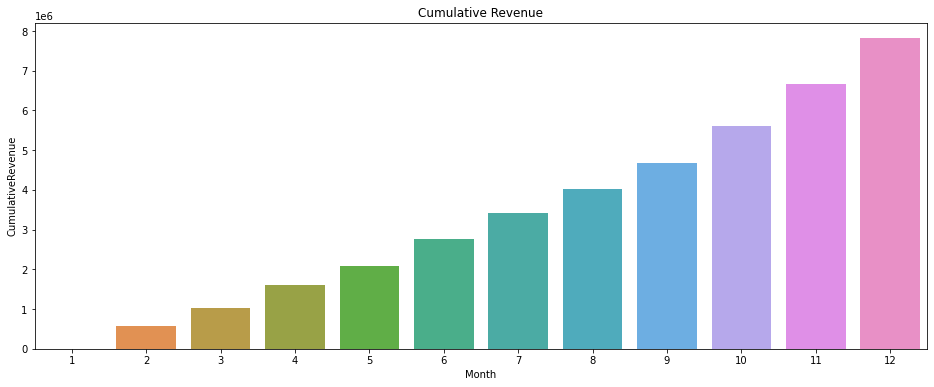

In [38]:
plt.axes=plt.subplots(figsize=(16,6))

a=sns.barplot(x="Month",y="CumulativeRevenue",data=Revenue_data)
a.set_title("Cumulative Revenue")

### Monthly percent change in growth rate

#### Monthly Growth Rate Pecentage

In [39]:
Revenue_data["MonthlyGrowth"]=Revenue_data["Revenue"].pct_change()

In [40]:
Revenue_data

,Month,Revenue,CumulativeRevenue,MonthlyGrowth
0,1,569445.040,0.000,NaN
1,2,447137.350,569445.040,-0.214784
2,3,595500.760,1016582.390,0.331807
3,4,469200.361,1612083.150,-0.212091
4,5,678594.560,2081283.511,0.446279
5,6,661213.690,2759878.071,-0.025613
6,7,600091.011,3421091.761,-0.092440
7,8,645343.900,4021182.772,0.075410
8,9,952838.382,4666526.672,0.476482
9,10,1039318.790,5619365.054,0.090761


In [41]:
Revenue_data["MonthlyGrowth"]=Revenue_data["MonthlyGrowth"].fillna(0)

Text(0.5, 1.0, 'Monthly Growth')

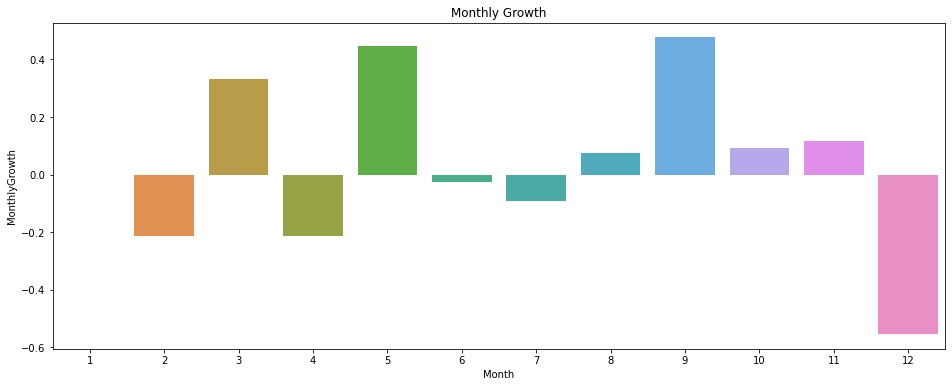

In [42]:
plt.axes=plt.subplots(figsize=(16,6))

a=sns.barplot(x="Month",y="MonthlyGrowth",data=Revenue_data)
a.set_title("Monthly Growth")

Text(0.5, 1.0, 'Monthly Growth')

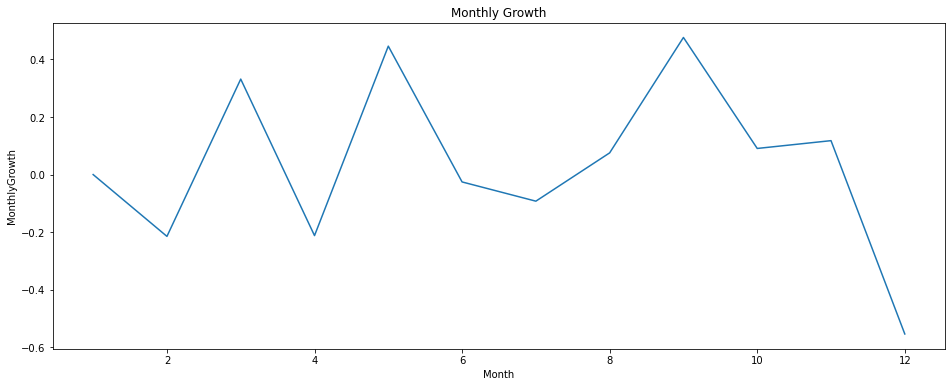

In [43]:
plt.axes=plt.subplots(figsize=(16,6))

a=sns.lineplot(x="Month",y="MonthlyGrowth",data=Revenue_data)
a.set_title("Monthly Growth")

- There are ups and downs in growth rate for different month
- There is a sudden Decrease in the growth from 3rd month to 4th month and then agian a rapid fall in th growth in 6th month so their is a lot fluctuations going on .
- After 6th month their were a little but continious increase in growth till 9th month .


### Revenue by Country

In [44]:
CountryRevenue=data.groupby("Country")["Revenue"].sum().reset_index()

In [45]:
CountryRevenue

,Country,Revenue
0,Australia,1.374885e+05
1,Austria,9.921480e+03
2,Bahrain,5.484000e+02
3,Belgium,3.938643e+04
4,Brazil,1.143600e+03
5,Canada,3.666380e+03
6,Channel Islands,2.008691e+04
7,Cyprus,1.199956e+04
8,Czech Republic,8.267400e+02
9,Denmark,1.767384e+04


Text(0.5, 1.0, 'Revenue by country')

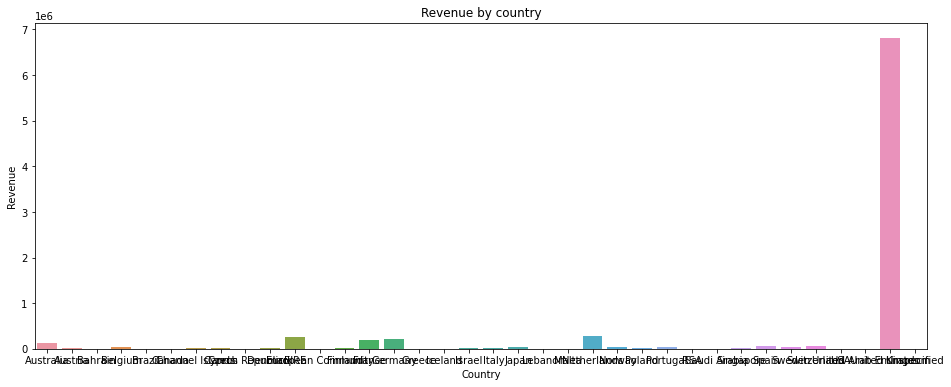

In [46]:
plt.axes=plt.subplots(figsize=(16,6))

a=sns.barplot(x="Country",y="Revenue",data=CountryRevenue)
a.set_title("Revenue by country")

- United Kingdom is producing highest revenue 

### Monthwise unique Active Customers

In [47]:
Total_cus_month=data.groupby("Month")["CustomerID"].nunique().reset_index()

In [48]:
Total_cus_month

,Month,CustomerID
0,1,741
1,2,758
2,3,974
3,4,856
4,5,1056
5,6,991
6,7,949
7,8,935
8,9,1266
9,10,1364


Text(0.5, 1.0, 'Monthwise unique active customers')

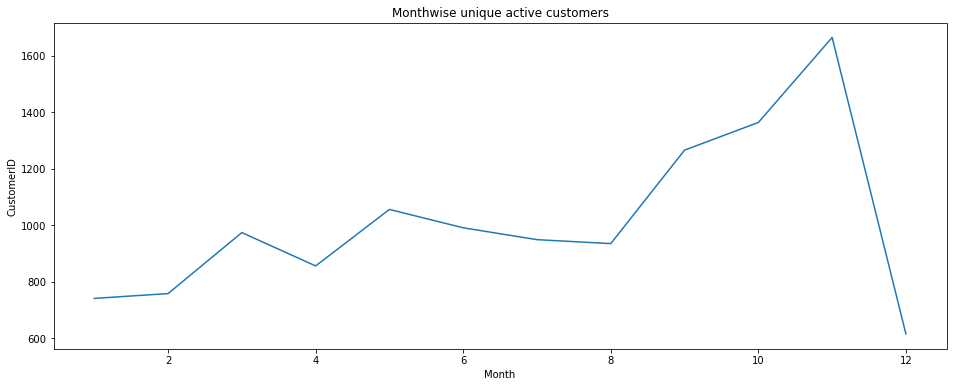

In [49]:
plt.axes=plt.subplots(figsize=(16,6))

a=sns.lineplot(x="Month",y="CustomerID",data=Total_cus_month)
a.set_title("Monthwise unique active customers")

### Countrywise unique Active Customers

In [50]:
Total_cus_country=data.groupby("Country")["CustomerID"].nunique().reset_index()

In [51]:
Total_cus_country

,Country,CustomerID
0,Australia,9
1,Austria,10
2,Bahrain,2
3,Belgium,25
4,Brazil,1
5,Canada,4
6,Channel Islands,8
7,Cyprus,8
8,Czech Republic,1
9,Denmark,9


Text(0.5, 1.0, 'Countrywise unique active customers')

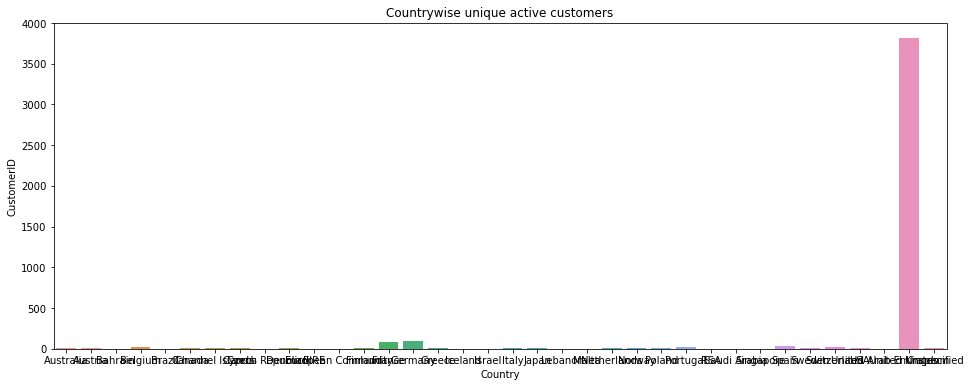

In [52]:
plt.axes=plt.subplots(figsize=(16,6))

a=sns.barplot(x="Country",y="CustomerID",data=Total_cus_country)
a.set_title("Countrywise unique active customers")

- United Kingdom has highest number of unique customers

### Total orders by Month

In [53]:
OrdersMonth=data.groupby("Month")["InvoiceNo"].nunique().reset_index()

In [54]:
OrdersMonth

,Month,InvoiceNo
0,1,987
1,2,998
2,3,1321
3,4,1149
4,5,1555
5,6,1393
6,7,1331
7,8,1281
8,9,1756
9,10,1929


Text(0.5, 1.0, 'Total Orders per month')

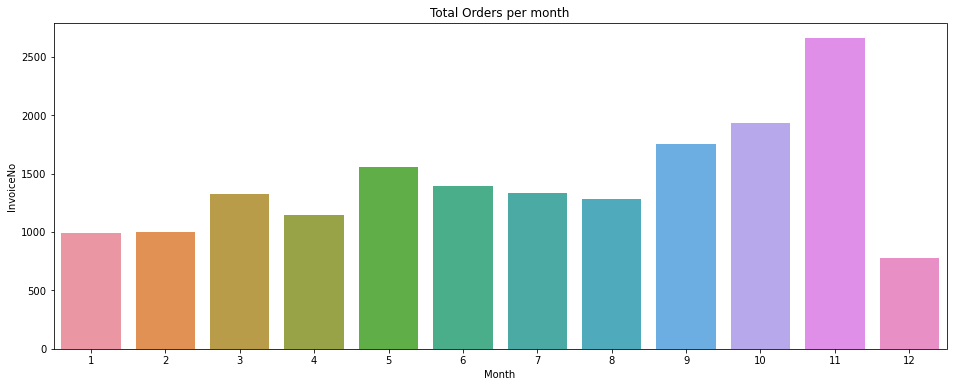

In [55]:
plt.axes=plt.subplots(figsize=(16,6))

a=sns.barplot(x="Month",y="InvoiceNo",data=OrdersMonth)
a.set_title("Total Orders per month")

### Total orders by Country

In [56]:
OrdersCountry=data.groupby("Country")["InvoiceNo"].nunique().reset_index()

In [57]:
OrdersCountry

,Country,InvoiceNo
0,Australia,54
1,Austria,16
2,Bahrain,2
3,Belgium,93
4,Brazil,1
5,Canada,6
6,Channel Islands,25
7,Cyprus,15
8,Czech Republic,2
9,Denmark,17


- United Kingdom has highest number of orders 

Text(0.5, 1.0, 'Total Orders - Country')

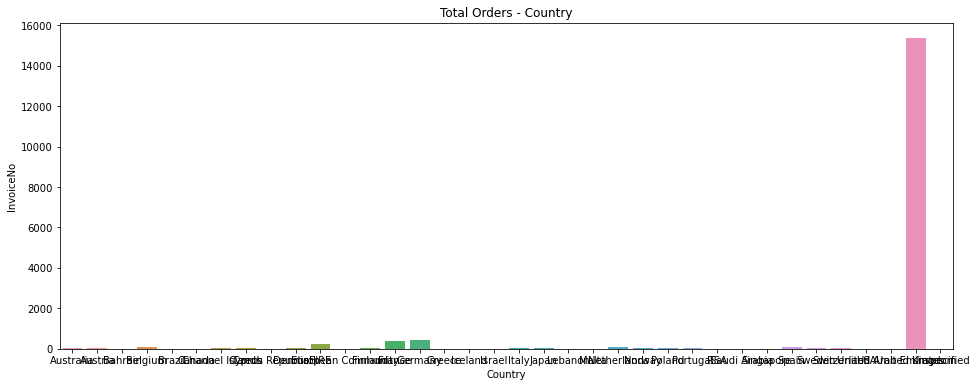

In [58]:
plt.axes=plt.subplots(figsize=(16,6))

a=sns.barplot(x="Country",y="InvoiceNo",data=OrdersCountry)
a.set_title("Total Orders - Country")

### Total Orderlines by country and month 

In [59]:
order_line =data.groupby("Month")["Quantity"].sum().reset_index()

In [60]:
print(order_line)

    Month  Quantity
0       1    349147
1       2    265638
2       3    348544
3       4    292225
4       5    373685
5       6    363699
6       7    369432
7       8    398938
8       9    544899
9      10    593908
10     11    681888
11     12    287413


Text(0.5, 1.0, 'Order line - Month')

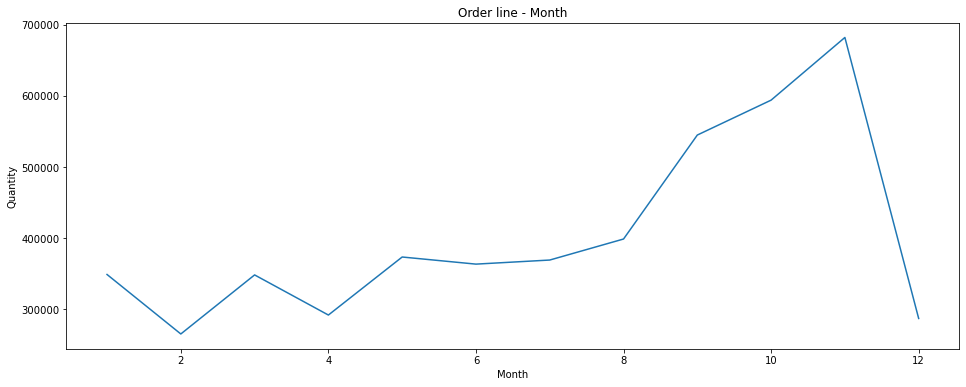

In [61]:
plt.axes=plt.subplots(figsize=(16,6))

a=sns.lineplot(x="Month",y="Quantity",data=order_line)
a.set_title("Order line - Month")

In [62]:
order_line_country= data.groupby("Country")["Quantity"].sum().reset_index()

In [63]:
order_line_country

,Country,Quantity
0,Australia,83742
1,Austria,4830
2,Bahrain,260
3,Belgium,21482
4,Brazil,356
5,Canada,2763
6,Channel Islands,9411
7,Cyprus,5444
8,Czech Republic,671
9,Denmark,7781


Text(0.5, 1.0, 'Order Line - Country')

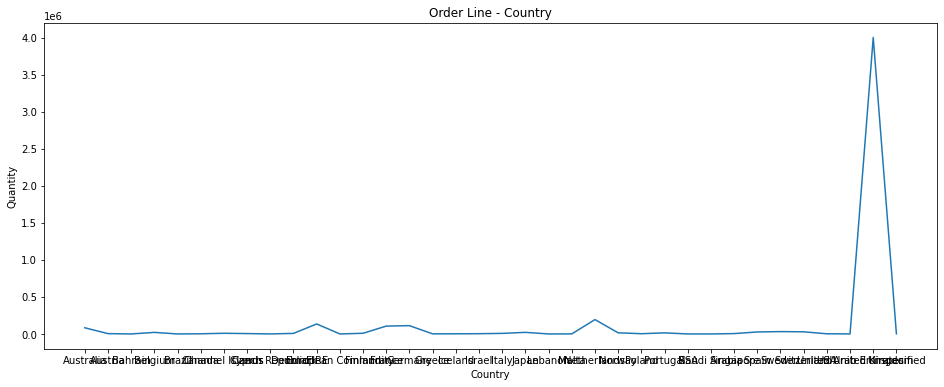

In [64]:
plt.axes=plt.subplots(figsize=(16,6))

a=sns.lineplot(x="Country",y="Quantity",data=order_line_country)
a.set_title("Order Line - Country")

### Total SKU - Month

In [65]:
SKU_month=data.groupby("Month")["StockCode"].nunique().reset_index()

In [66]:
SKU_month

,Month,StockCode
0,1,2121
1,2,2124
2,3,2234
3,4,2217
4,5,2219
5,6,2339
6,7,2351
7,8,2356
8,9,2545
9,10,2622


Text(0.5, 1.0, 'SKU per Month')

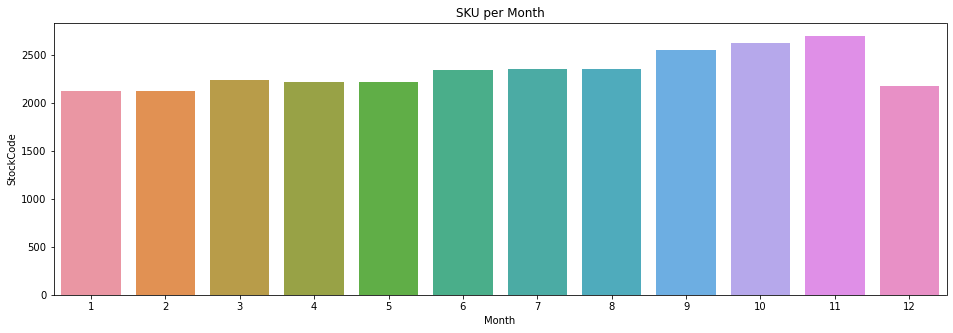

In [67]:
plt.axes=plt.subplots(figsize=(16,5))
a=sns.barplot(x="Month",y="StockCode",data=SKU_month)
a.set_title("SKU per Month")

### Total SKU - Country

In [68]:
SKU_country=data.groupby("Country")["StockCode"].nunique().reset_index()

In [69]:
SKU_country

,Country,StockCode
0,Australia,589
1,Austria,301
2,Bahrain,16
3,Belgium,754
4,Brazil,32
5,Canada,147
6,Channel Islands,419
7,Cyprus,444
8,Czech Republic,25
9,Denmark,242


Text(0.5, 1.0, 'Total SKU - Country')

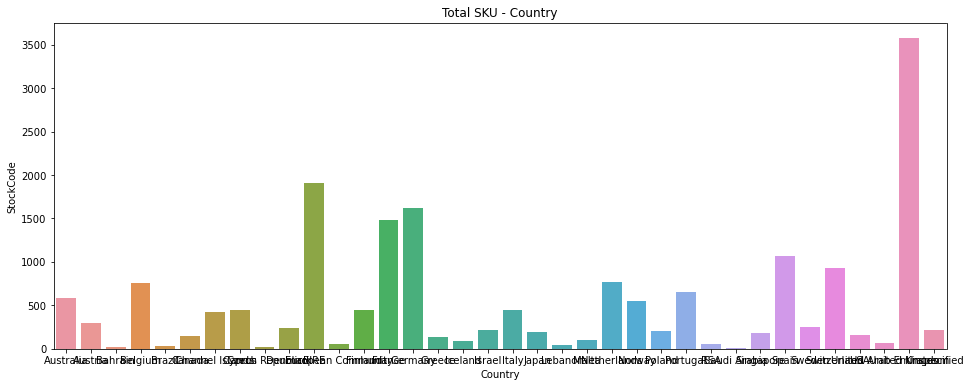

In [70]:
plt.axes=plt.subplots(figsize=(16,6))

a=sns.barplot(x="Country",y="StockCode",data=SKU_country)
a.set_title("Total SKU - Country")

### Average monthly revenue per order

In [71]:
Avg_revenue=data.groupby("Month")["Revenue"].mean().reset_index()

In [72]:
Avg_revenue

,Month,Revenue
0,1,26.820132
1,2,22.437643
2,3,21.911939
3,4,20.720737
4,5,23.959980
5,6,24.322740
6,7,22.368920
7,8,23.890123
8,9,23.803107
9,10,20.972189


Text(0.5, 1.0, 'Average Revenue per Month')

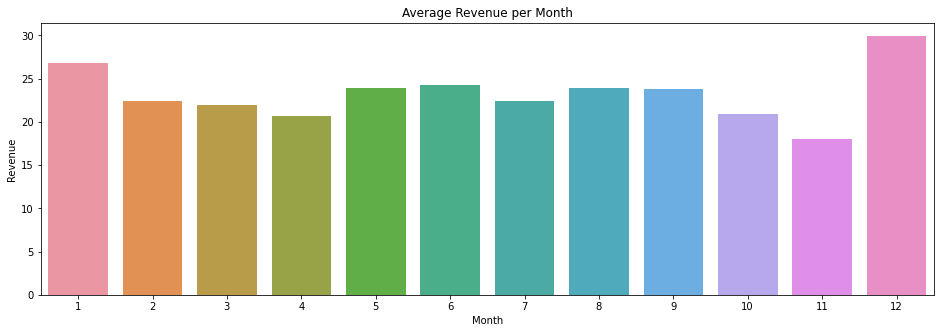

In [73]:
plt.axes=plt.subplots(figsize=(16,5))
a=sns.barplot(x="Month",y="Revenue",data=Avg_revenue)
a.set_title("Average Revenue per Month")

###  New Customers 

In [74]:
New_customers=data.CustomerID

In [75]:
New_customers

0         13313.0
1         13313.0
2         13313.0
3         13313.0
4         13313.0
           ...   
499423    12680.0
499424    12680.0
499425    12680.0
499426    12680.0
499427    12680.0
Name: CustomerID, Length: 371764, dtype: float64

In [76]:
data_min_purchase= data.groupby("CustomerID").date.min().reset_index()
data_min_purchase.columns=["CustomerID","MinPurchaseDate"]

In [77]:
data_min_purchase.head()

,CustomerID,MinPurchaseDate
0,12346.0,2011-01-18
1,12347.0,2011-01-26
2,12348.0,2011-01-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [78]:
data_min_purchase["MinPurchaseDate"]=pd.to_datetime(data_min_purchase.MinPurchaseDate)

In [79]:
data=pd.merge(data,data_min_purchase,on="CustomerID")

In [80]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,date,time,UnitPrice,CustomerID,Country,Year,Month,day,Revenue,MinPurchaseDate
0,539993,22386,JUMBO BAG PINK POLKADOT,10,1/4/2011 10:00,2011-01-04,2021-08-21 10:00:00,1.95,13313.0,United Kingdom,2011,1,4,19.5,2011-01-04
1,539993,21499,BLUE POLKADOT WRAP,25,1/4/2011 10:00,2011-01-04,2021-08-21 10:00:00,0.42,13313.0,United Kingdom,2011,1,4,10.5,2011-01-04
2,539993,21498,RED RETROSPOT WRAP,25,1/4/2011 10:00,2011-01-04,2021-08-21 10:00:00,0.42,13313.0,United Kingdom,2011,1,4,10.5,2011-01-04
3,539993,22379,RECYCLING BAG RETROSPOT,5,1/4/2011 10:00,2011-01-04,2021-08-21 10:00:00,2.10,13313.0,United Kingdom,2011,1,4,10.5,2011-01-04
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,1/4/2011 10:00,2011-01-04,2021-08-21 10:00:00,1.25,13313.0,United Kingdom,2011,1,4,12.5,2011-01-04


In [81]:
data["UserType"]="New"
data.loc[data["date"]>data["MinPurchaseDate"],"UserType"]="Existing"

In [82]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,date,time,UnitPrice,CustomerID,Country,Year,Month,day,Revenue,MinPurchaseDate,UserType
0,539993,22386,JUMBO BAG PINK POLKADOT,10,1/4/2011 10:00,2011-01-04,2021-08-21 10:00:00,1.95,13313.0,United Kingdom,2011,1,4,19.5,2011-01-04,New
1,539993,21499,BLUE POLKADOT WRAP,25,1/4/2011 10:00,2011-01-04,2021-08-21 10:00:00,0.42,13313.0,United Kingdom,2011,1,4,10.5,2011-01-04,New
2,539993,21498,RED RETROSPOT WRAP,25,1/4/2011 10:00,2011-01-04,2021-08-21 10:00:00,0.42,13313.0,United Kingdom,2011,1,4,10.5,2011-01-04,New
3,539993,22379,RECYCLING BAG RETROSPOT,5,1/4/2011 10:00,2011-01-04,2021-08-21 10:00:00,2.10,13313.0,United Kingdom,2011,1,4,10.5,2011-01-04,New
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,1/4/2011 10:00,2011-01-04,2021-08-21 10:00:00,1.25,13313.0,United Kingdom,2011,1,4,12.5,2011-01-04,New


In [83]:
data["Usertypenum"]=-1
data.loc[data["UserType"]=="New","Usertypenum"]=1

In [84]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,date,time,UnitPrice,CustomerID,Country,Year,Month,day,Revenue,MinPurchaseDate,UserType,Usertypenum
0,539993,22386,JUMBO BAG PINK POLKADOT,10,1/4/2011 10:00,2011-01-04,2021-08-21 10:00:00,1.95,13313.0,United Kingdom,2011,1,4,19.5,2011-01-04,New,1
1,539993,21499,BLUE POLKADOT WRAP,25,1/4/2011 10:00,2011-01-04,2021-08-21 10:00:00,0.42,13313.0,United Kingdom,2011,1,4,10.5,2011-01-04,New,1
2,539993,21498,RED RETROSPOT WRAP,25,1/4/2011 10:00,2011-01-04,2021-08-21 10:00:00,0.42,13313.0,United Kingdom,2011,1,4,10.5,2011-01-04,New,1
3,539993,22379,RECYCLING BAG RETROSPOT,5,1/4/2011 10:00,2011-01-04,2021-08-21 10:00:00,2.10,13313.0,United Kingdom,2011,1,4,10.5,2011-01-04,New,1
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,1/4/2011 10:00,2011-01-04,2021-08-21 10:00:00,1.25,13313.0,United Kingdom,2011,1,4,12.5,2011-01-04,New,1


In [85]:
# Monthly total customer by User type

In [86]:
Monthly_customers_type=data.groupby(["Month" ,"UserType"])["Usertypenum"].sum().reset_index()

In [87]:
Monthly_customers_type

,Month,UserType,Usertypenum
0,1,Existing,-3429
1,1,New,17803
2,2,Existing,-8738
3,2,New,11190
4,3,Existing,-13988
5,3,New,13189
6,4,Existing,-14109
7,4,New,8535
8,5,Existing,-21578
9,5,New,6744


In [88]:
Monthly_new_Customers=data.query("UserType == 'New'").groupby("Month")["Usertypenum"].sum().reset_index()

In [89]:
Monthly_new_Customers

,Month,Usertypenum
0,1,17803
1,2,11190
2,3,13189
3,4,8535
4,5,6744
5,6,6076
6,7,5094
7,8,4997
8,9,8093
9,10,11412


### Total Revenue per month by user type

In [90]:
Ut_revenue_pm=data.groupby(["Year","Month","UserType"])["Revenue"].sum().reset_index()

In [91]:
Ut_revenue_pm

,Year,Month,UserType,Revenue
0,2011,1,Existing,92654.070
1,2011,1,New,476790.970
2,2011,2,Existing,228604.580
3,2011,2,New,218532.770
4,2011,3,Existing,373138.010
5,2011,3,New,222362.750
6,2011,4,Existing,332601.770
7,2011,4,New,136598.591
8,2011,5,Existing,550580.240
9,2011,5,New,128014.320


### Total revenue per month - Day

In [92]:
data["date"].min()

Timestamp('2011-01-04 00:00:00')

In [93]:
data["date"].max()

Timestamp('2011-12-09 00:00:00')

In [94]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,date,time,UnitPrice,CustomerID,Country,Year,Month,day,Revenue,MinPurchaseDate,UserType,Usertypenum
0,539993,22386,JUMBO BAG PINK POLKADOT,10,1/4/2011 10:00,2011-01-04,2021-08-21 10:00:00,1.95,13313.0,United Kingdom,2011,1,4,19.5,2011-01-04,New,1
1,539993,21499,BLUE POLKADOT WRAP,25,1/4/2011 10:00,2011-01-04,2021-08-21 10:00:00,0.42,13313.0,United Kingdom,2011,1,4,10.5,2011-01-04,New,1
2,539993,21498,RED RETROSPOT WRAP,25,1/4/2011 10:00,2011-01-04,2021-08-21 10:00:00,0.42,13313.0,United Kingdom,2011,1,4,10.5,2011-01-04,New,1
3,539993,22379,RECYCLING BAG RETROSPOT,5,1/4/2011 10:00,2011-01-04,2021-08-21 10:00:00,2.10,13313.0,United Kingdom,2011,1,4,10.5,2011-01-04,New,1
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,1/4/2011 10:00,2011-01-04,2021-08-21 10:00:00,1.25,13313.0,United Kingdom,2011,1,4,12.5,2011-01-04,New,1


In [95]:
new_revenue=data.query("UserType == 'New'").groupby("day")["Revenue"].sum().reset_index()

In [96]:
new_revenue

,day,Revenue
0,1,56621.860
1,2,48055.040
2,3,53662.490
3,4,57201.190
4,5,57696.850
5,6,78639.960
6,7,100179.200
7,8,57745.850
8,9,64306.820
9,10,110110.390


Text(0.5, 1.0, 'Revenue by day-New')

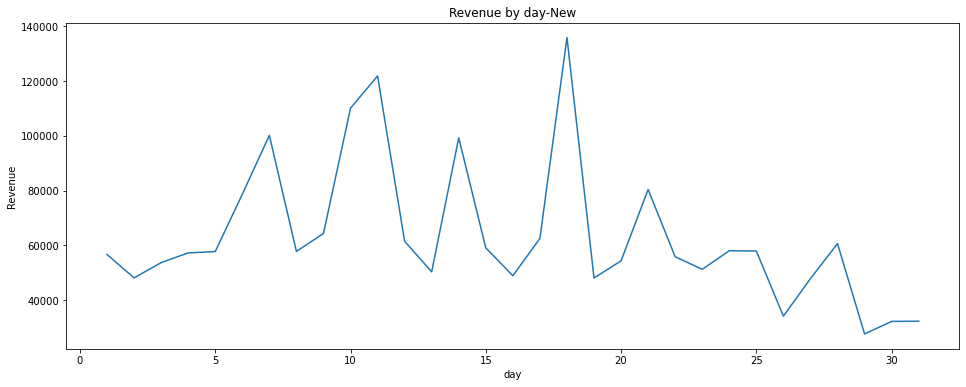

In [97]:
plt.axes=plt.subplots(figsize=(16,6))

a=sns.lineplot(x="day",y="Revenue",data=new_revenue)
a.set_title("Revenue by day-New")

In [98]:
existing_revenue=data.query("UserType == 'Existing'").groupby("day")["Revenue"].sum().reset_index()
existing_revenue

,day,Revenue
0,1,183372.520
1,2,161487.180
2,3,207845.950
3,4,272146.030
4,5,264565.360
5,6,226904.240
6,7,222814.470
7,8,199752.780
8,9,357677.360
9,10,181345.510


Text(0.5, 1.0, 'Revenue by day-Existing')

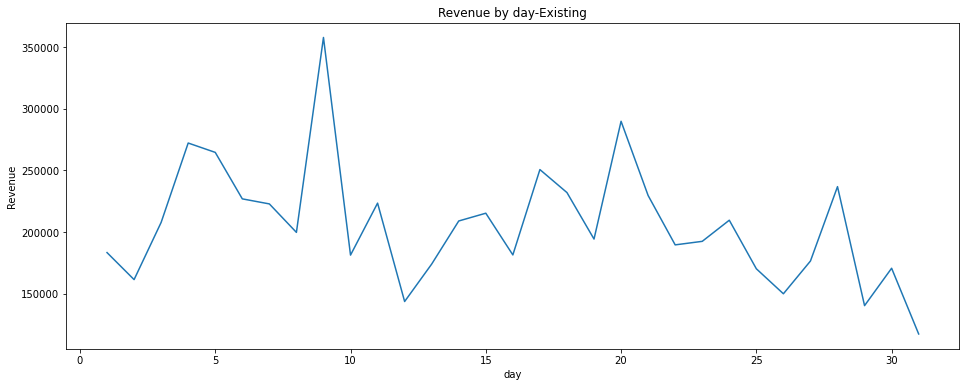

In [99]:
plt.axes=plt.subplots(figsize=(16,6))

a=sns.lineplot(x="day",y="Revenue",data=existing_revenue)
a.set_title("Revenue by day-Existing")

### Monthly Retention Rate

In [100]:
## looking at consumers who are active using their revenue per month
data_pm_userpurchase=data.groupby(["CustomerID","Year","Month"])["Revenue"].sum().reset_index()

In [101]:
data_pm_userpurchase

,CustomerID,Year,Month,Revenue
0,12346.0,2011,1,77183.60
1,12347.0,2011,1,475.39
2,12347.0,2011,4,636.25
3,12347.0,2011,6,382.52
4,12347.0,2011,8,584.91
...,...,...,...,...
12165,18283.0,2011,10,114.65
12166,18283.0,2011,11,651.56
12167,18283.0,2011,12,208.00
12168,18287.0,2011,5,765.28


In [102]:
data_retention= pd.crosstab(data_pm_userpurchase["CustomerID"],data_pm_userpurchase["Month"]).reset_index()

In [103]:
data_retention.head()

Month,CustomerID,1,2,3,4,5,6,7,8,9,10,11,12
0,12346.0,1,0,0,0,0,0,0,0,0,0,0,0
1,12347.0,1,0,0,1,0,1,0,1,0,1,0,1
2,12348.0,1,0,0,1,0,0,0,0,1,0,0,0
3,12349.0,0,0,0,0,0,0,0,0,0,0,1,0
4,12350.0,0,1,0,0,0,0,0,0,0,0,0,0


In [104]:
# Total retained user on monthly basis

## Customer Segmentation

In [105]:
import datetime as dt

In [106]:
data["date"].max()

Timestamp('2011-12-09 00:00:00')

In [107]:
#setting latest date 2011-12-10 as last invoice date is 2011-12-09. This is to calculate the number of days from recent purchase
Latest_date=dt.datetime(2011,12,10)

In [108]:
data["InvoiceDate"]=pd.to_datetime(data.InvoiceDate)

#### Calculating Recency , Frequency and Monetary

In [109]:
RFMScores = data.groupby('CustomerID').agg({'date': lambda x: (Latest_date - x.max()).days, 
                                                'InvoiceNo': lambda x: len(x), 'Revenue': lambda x: x.sum()})

In [110]:
RFMScores

,date,InvoiceNo,Revenue
CustomerID,,,
12346.0,326,1,77183.60
12347.0,3,151,3598.21
12348.0,76,14,904.44
12349.0,19,73,1757.55
12350.0,311,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


In [111]:
RFMScores["date"]=RFMScores["date"].astype(int)

In [112]:
RFMScores.rename(columns={"CustomerID":"CustomerId","date":"Recency","InvoiceNo":"Frequency","Revenue":"Monetary"},inplace=True)

In [113]:
RFMScores

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,3,151,3598.21
12348.0,76,14,904.44
12349.0,19,73,1757.55
12350.0,311,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


In [114]:
# Descriptive Analysis
RFMScores.Recency.describe()

count    4220.000000
mean       85.330095
std        90.076530
min         1.000000
25%        18.000000
50%        48.000000
75%       129.000000
max       340.000000
Name: Recency, dtype: float64

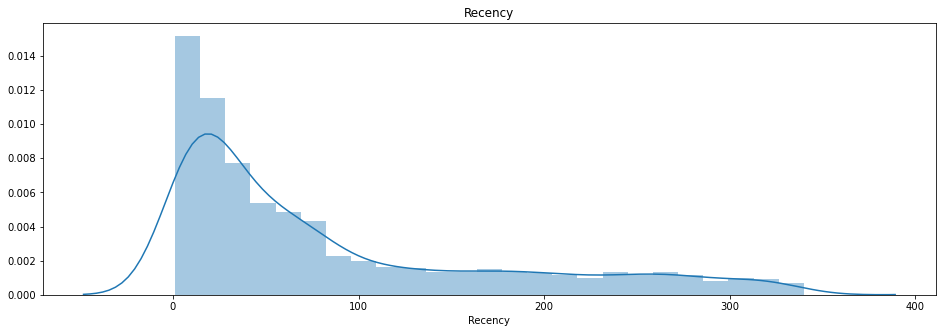

In [138]:
plt.axes=plt.subplots(figsize=(16,5))
x=RFMScores["Recency"]
plt.title("Recency")
sns.distplot(x)

- Here we can see our data is right skewed that shows there are very less customers who visit the site to shop often.

In [116]:
RFMScores.Frequency.describe()

count    4220.000000
mean       88.095735
std       219.491157
min         1.000000
25%        17.000000
50%        40.000000
75%        96.250000
max      7560.000000
Name: Frequency, dtype: float64

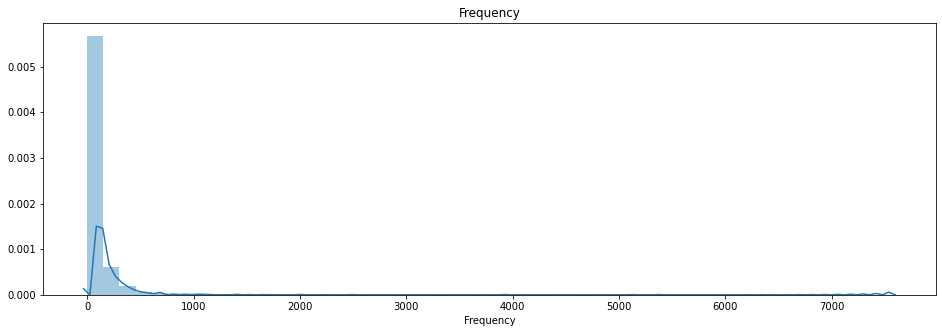

In [140]:
plt.axes=plt.subplots(figsize=(16,5))
x=RFMScores["Frequency"]
plt.title("Frequency")
sns.distplot(x)

In [118]:
RFMScores.Monetary.describe()

count      4220.000000
mean       1975.993842
std        8669.604358
min           0.000000
25%         304.250000
50%         664.555000
75%        1614.460000
max      271614.140000
Name: Monetary, dtype: float64

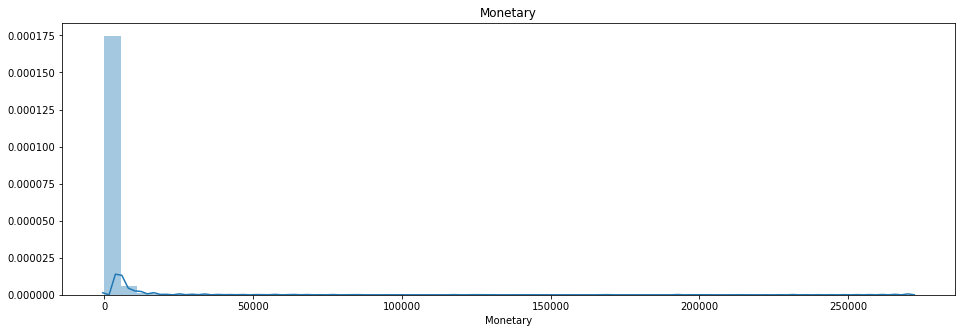

In [139]:
plt.axes=plt.subplots(figsize=(16,5))
x=RFMScores["Monetary"]
plt.title("Monetary")
sns.distplot(x)

In [120]:
# splitting into four segments using quantiles- K-Means
quantile= RFMScores.quantile(q=[0.25,0.5,0.75])
quantile=quantile.to_dict()

In [121]:
quantile

{'Recency': {0.25: 18.0, 0.5: 48.0, 0.75: 129.0},
 'Frequency': {0.25: 17.0, 0.5: 40.0, 0.75: 96.25},
 'Monetary': {0.25: 304.25000000000006,
  0.5: 664.5550000000001,
  0.75: 1614.4599999999998}}

In [122]:
# Creating R F M Segments:
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <=d[p][0.50]:
        return 2
    elif x <=d[p][0.75]:
        return 3 
    else:
        return 4

In [123]:
print(x)

CustomerID
12346.0    77183.60
12347.0     3598.21
12348.0      904.44
12349.0     1757.55
12350.0      334.40
             ...   
18280.0      180.60
18281.0       80.82
18282.0      178.05
18283.0     2094.88
18287.0     1837.28
Name: Monetary, Length: 4220, dtype: float64


In [124]:
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else :
        return 1

In [125]:
# Calculating and adding R, F, M column to show R,F,M segment
RFMScores["R"]=RFMScores["Recency"].apply(RScoring, args=("Recency",quantile))
RFMScores["F"]=RFMScores["Frequency"].apply(FnMScoring, args=("Frequency",quantile))
RFMScores["M"]=RFMScores["Monetary"].apply(FnMScoring, args=("Monetary",quantile))


In [126]:
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,326,1,77183.60,4,4,1
12347.0,3,151,3598.21,1,1,1
12348.0,76,14,904.44,3,4,2
12349.0,19,73,1757.55,2,2,1
12350.0,311,17,334.40,4,4,3


In [127]:
RFMScores["RFMGroup"]=RFMScores.R.map(str)+RFMScores.F.map(str)+RFMScores.M.map(str)

In [128]:
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup
CustomerID,,,,,,,
12346.0,326,1,77183.60,4,4,1,441
12347.0,3,151,3598.21,1,1,1,111
12348.0,76,14,904.44,3,4,2,342
12349.0,19,73,1757.55,2,2,1,221
12350.0,311,17,334.40,4,4,3,443


In [129]:
# Calculating total scores by calculating sum of R, F, M values
RFMScores["RFMScore"]=RFMScores[["R","F","M"]].sum(axis=1)

In [130]:
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,326,1,77183.60,4,4,1,441,9
12347.0,3,151,3598.21,1,1,1,111,3
12348.0,76,14,904.44,3,4,2,342,9
12349.0,19,73,1757.55,2,2,1,221,5
12350.0,311,17,334.40,4,4,3,443,11


#### Analysing Best , Medium and Worst customers

In [131]:
#Categorising customer on the basis of their RFM Score
Cus_category=["Best","Medium","Worst"]
Score_cuts=pd.qcut(RFMScores.RFMScore,q=3,labels=Cus_category)
RFMScores["RFM_Cus_Category"]=Score_cuts.values

In [132]:
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Cus_Category
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,4,4,1,441,9,Medium
12347.0,3,151,3598.21,1,1,1,111,3,Best
12348.0,76,14,904.44,3,4,2,342,9,Medium
12349.0,19,73,1757.55,2,2,1,221,5,Best
12350.0,311,17,334.40,4,4,3,443,11,Worst


In [133]:
RFMScores_Best=RFMScores.RFM_Cus_Category.value_counts()

In [134]:
RFMScores_Best

Best      1627
Medium    1347
Worst     1246
Name: RFM_Cus_Category, dtype: int64

- So here we can see we have 1649 best customers on our website who do regular visit and purchase regularly a good amount of product . These Customers are very important for the company so we should focus more on such customers.
- There are 1336 customers who come under the medium category i.e. they visit the website more often so to attract such customers we have to bring new policies.We should focus on customising the product so that these customers should visit the website more often.
- Now there are 1259 customers who comes under worst category who visited the website for once or twice may be when there may be some sort of sale on the website.We should get the information about what product the customers visit the website and then focus on customising the product so that those customers don't have to visit other websites .